In [1]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [1]:
from glob import glob
import zipfile
import subprocess
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import torchsummary
import numpy as np
from PIL import Image
import json
import cv2
import time

In [3]:
source_path = '/content/drive/Othercomputers/Home/data_age/data/Training/image'
image_zips = sorted(glob(source_path + '/*.zip'))
image_zips[:9]

['/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0001.zip',
 '/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0002.zip',
 '/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0003.zip',
 '/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0004.zip',
 '/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0005.zip',
 '/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0006.zip',
 '/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0007.zip',
 '/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0008.zip',
 '/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0009.zip']

In [4]:
# def unzip_files(zip_files, dst_path):
#     for zip_file in zip_files:
#         folder_name = os.path.splitext(os.path.basename(zip_file))[0].split('_')[-1]
#         extraction_path = os.path.join(dst_path, folder_name)

#         if not os.path.exists(extraction_path):
#             os.makedirs(extraction_path)

#         try:
#             result = subprocess.run(["unzip", "-o", zip_file, "-d", extraction_path], check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
#             print(f"Successfully extracted {zip_file} to {extraction_path}")
#         except subprocess.CalledProcessError as e:
#             print(f"Failed to extract {zip_file}, Error: {e.stderr.decode()}")


In [5]:
# dst_path = '/content/dataset/train/source'
# unzip_files(image_zips, dst_path)

In [6]:
print(image_zips.index('/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0009.zip'))
print(image_zips.index('/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0269.zip'))

8
245


In [7]:
# train_image : 9~269

# def unzip_files(zip_files, dst_path):
#     for zip_file in zip_files:
#         folder_name = os.path.splitext(os.path.basename(zip_file))[0].split('_')[-1]
#         extraction_path = os.path.join(dst_path, folder_name)

#         if not os.path.exists(extraction_path):
#             os.makedirs(extraction_path)

#         try:
#             subprocess.run(["unzip", "-o", zip_file, "-d", extraction_path], check=True)
#             print(f"Successfully extracted {zip_file} to {extraction_path}")
#         except subprocess.CalledProcessError as e:
#             print(f"Failed to extract, Error: {e}")

# dst_path = '/content/dataset/train/source'
# unzip_files(image_zips, dst_path)

In [ ]:
# 병렬처리 - 처리시간이 더 빠른가?
# import concurrent.futures

# class ZipDataset():
#     def __init__(self, zip_paths, dst_path):
#         self.zip_paths = zip_paths
#         self.dst_path = dst_path

#     def extract_zip(self, path):
#         folder_name = os.path.splitext(os.path.basename(path))[0].split('_')[1]
#         final_path = os.path.join(self.dst_path, folder_name)

#         if not zipfile.is_zipfile(path):
#             print(f'Zip File Problem : {path}')
#             return

#         if not os.path.exists(final_path):
#             os.makedirs(final_path)

#         try:
#             with zipfile.ZipFile(path, 'r') as zip_ref:
#                 zip_ref.extractall(final_path)
#             print(f'Success : {final_path}')
#         except zipfile.BadZipFile:
#             print(f"Bad Zip File: {path}")
#         except Exception as e:
#             print(f"Error {path}: {e}")

#     def extract(self):
#         with concurrent.futures.ProcessPoolExecutor() as executor:
#             executor.map(self.extract_zip, self.zip_paths)

# # 사용 예
# dst_path_image = '/content/dataset/train/source'
# zip_image = ZipDataset(image_zips[9:], dst_path_image)
# %time zip_image.extract()

In [8]:
class ZipDataset():
    def __init__(self, zip_paths, dst_path):
        self.zip_paths = zip_paths
        self.dst_path = dst_path

    def verify_zip_file(self, zip_file):
        return zipfile.is_zipfile(zip_file)

    def extract(self):
        for path in self.zip_paths:
            folder_name = os.path.splitext(os.path.basename(path))[0].split('_')[1]
            final_path = os.path.join(self.dst_path, folder_name)

            if not self.verify_zip_file(path):
                print(f'Zip File Problem : {path}')
                continue

            if not os.path.exists(final_path):
                os.makedirs(final_path)

            try:
                with zipfile.ZipFile(path, 'r') as zip_ref:
                    zip_ref.extractall(final_path)
                print(f'Success : {final_path}')
            except zipfile.BadZipFile:
                print(f"Bad Zip File: {path}")
            except Exception as e:
                print(f"Error {path}: {e}")

dst_path_image = '/content/dataset/train/source'
%time zip_image = ZipDataset(image_zips[:8], dst_path_image).extract()

Success : /content/dataset/train/source/0001
Success : /content/dataset/train/source/0002
Success : /content/dataset/train/source/0003
Success : /content/dataset/train/source/0004
Success : /content/dataset/train/source/0005
Success : /content/dataset/train/source/0006
Success : /content/dataset/train/source/0007
Success : /content/dataset/train/source/0008
Error /content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0009.zip: [Errno 107] Transport endpoint is not connected
Zip File Problem : /content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0010.zip
Zip File Problem : /content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0011.zip
Zip File Problem : /content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0012.zip
Zip File Problem : /content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0013.zip
Zip File Problem : /content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0014.zip
Zip File Problem : /content/drive/

In [11]:
# zip = ZipDataset(image_zips[8:9], dst_path_image).extract()
# !mkdir -p "/content/dataset/train/source/0009"
!unzip "/content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0009.zip" -d "/content/dataset/train/source/0009"

Archive:  /content/drive/Othercomputers/Home/data_age/data/Training/image/TS_0009.zip
  inflating: /content/dataset/train/source/0009/0009_1991_00_00000001_D.png  
  inflating: /content/dataset/train/source/0009/0009_1991_00_00000002_D.png  
  inflating: /content/dataset/train/source/0009/0009_1991_00_00000003_D.png  
  inflating: /content/dataset/train/source/0009/0009_1991_00_00000006_F.png  
  inflating: /content/dataset/train/source/0009/0009_1991_00_00000009_F.png  
  inflating: /content/dataset/train/source/0009/0009_1991_00_00000010_F.png  
  inflating: /content/dataset/train/source/0009/0009_1991_00_00000011_F.png  
  inflating: /content/dataset/train/source/0009/0009_1991_00_00000012_F.png  
  inflating: /content/dataset/train/source/0009/0009_1991_01_00000013_F.png  
  inflating: /content/dataset/train/source/0009/0009_1991_02_00000014_F.png  
  inflating: /content/dataset/train/source/0009/0009_1991_02_00000015_F.png  
  inflating: /content/dataset/train/source/0009/0009_199

In [12]:
%time zip = ZipDataset(image_zips[9:], dst_path_image).extract()

Success : /content/dataset/train/source/0010
Success : /content/dataset/train/source/0011
Success : /content/dataset/train/source/0012
Success : /content/dataset/train/source/0013
Success : /content/dataset/train/source/0014
Success : /content/dataset/train/source/0015
Success : /content/dataset/train/source/0016
Success : /content/dataset/train/source/0017
Success : /content/dataset/train/source/0018
Success : /content/dataset/train/source/0019
Success : /content/dataset/train/source/0021
Success : /content/dataset/train/source/0022
Success : /content/dataset/train/source/0023
Success : /content/dataset/train/source/0024
Success : /content/dataset/train/source/0025
Success : /content/dataset/train/source/0026
Success : /content/dataset/train/source/0027
Success : /content/dataset/train/source/0028
Success : /content/dataset/train/source/0029
Success : /content/dataset/train/source/0030
Success : /content/dataset/train/source/0031
Success : /content/dataset/train/source/0032
Success : 

In [14]:
source_path = '/content/drive/Othercomputers/Home/data_age/data/Training/label'
zips = sorted(glob(source_path + '/*.zip'))

dst_path = '/content/dataset/train/label'
zip_label = ZipDataset(zips, dst_path)
zip_label.extract()

Success : /content/dataset/train/label/0001
Success : /content/dataset/train/label/0002
Success : /content/dataset/train/label/0003
Success : /content/dataset/train/label/0004
Success : /content/dataset/train/label/0005
Success : /content/dataset/train/label/0006
Success : /content/dataset/train/label/0007
Success : /content/dataset/train/label/0008
Success : /content/dataset/train/label/0009
Success : /content/dataset/train/label/0010
Success : /content/dataset/train/label/0011
Success : /content/dataset/train/label/0012
Success : /content/dataset/train/label/0013
Success : /content/dataset/train/label/0014
Success : /content/dataset/train/label/0015
Success : /content/dataset/train/label/0016
Success : /content/dataset/train/label/0017
Success : /content/dataset/train/label/0018
Success : /content/dataset/train/label/0019
Success : /content/dataset/train/label/0021
Success : /content/dataset/train/label/0022
Success : /content/dataset/train/label/0023
Success : /content/dataset/train

In [15]:
# 병렬처리
import concurrent.futures

class ZipDataset():
    def __init__(self, zip_paths, dst_path):
        self.zip_paths = zip_paths
        self.dst_path = dst_path

    def extract_zip(self, path):
        folder_name = os.path.splitext(os.path.basename(path))[0].split('_')[1]
        final_path = os.path.join(self.dst_path, folder_name)

        if not zipfile.is_zipfile(path):
            print(f'Zip File Problem : {path}')
            return

        if not os.path.exists(final_path):
            os.makedirs(final_path)

        try:
            with zipfile.ZipFile(path, 'r') as zip_ref:
                zip_ref.extractall(final_path)
            print(f'Success : {final_path}')
        except zipfile.BadZipFile:
            print(f"Bad Zip File: {path}")
        except Exception as e:
            print(f"Error {path}: {e}")

    def extract(self):
        with concurrent.futures.ProcessPoolExecutor() as executor:
            executor.map(self.extract_zip, self.zip_paths)

source_path = '/content/drive/Othercomputers/Home/data_age/data/Validation/image'
zips = sorted(glob(source_path + '/*.zip'))

dst_path = '/content/dataset/val/souce'
val_source = ZipDataset(zips, dst_path)
%time val_source.extract()

Success : /content/dataset/val/souce/0897
Success : /content/dataset/val/souce/0895
Success : /content/dataset/val/souce/0899
Success : /content/dataset/val/souce/0898
Success : /content/dataset/val/souce/0900
Success : /content/dataset/val/souce/0901
Success : /content/dataset/val/souce/0903
Success : /content/dataset/val/souce/0906
Success : /content/dataset/val/souce/0904
Success : /content/dataset/val/souce/0907
Success : /content/dataset/val/souce/0909
Success : /content/dataset/val/souce/0910
Success : /content/dataset/val/souce/0913
Success : /content/dataset/val/souce/0915
Success : /content/dataset/val/souce/0916
Success : /content/dataset/val/souce/0918
Success : /content/dataset/val/souce/0919
Success : /content/dataset/val/souce/0920
Success : /content/dataset/val/souce/0922
Success : /content/dataset/val/souce/0921
Success : /content/dataset/val/souce/0923
Success : /content/dataset/val/souce/0924
Success : /content/dataset/val/souce/0925
Success : /content/dataset/val/sou

In [16]:
source_path = '/content/drive/Othercomputers/Home/data_age/data/Validation/label'
zips = sorted(glob(source_path + '/*.zip'))

dst_path = '/content/dataset/val/label'
val_label = ZipDataset(zips, dst_path)
%time val_label.extract()

Success : /content/dataset/val/label/0895
Success : /content/dataset/val/label/0897
Success : /content/dataset/val/label/0898
Success : /content/dataset/val/label/0899
Success : /content/dataset/val/label/0900
Success : /content/dataset/val/label/0901
Success : /content/dataset/val/label/0903
Success : /content/dataset/val/label/0904
Success : /content/dataset/val/label/0906
Success : /content/dataset/val/label/0907
Success : /content/dataset/val/label/0909
Success : /content/dataset/val/label/0910
Success : /content/dataset/val/label/0913
Success : /content/dataset/val/label/0915
Success : /content/dataset/val/label/0918
Success : /content/dataset/val/label/0916
Success : /content/dataset/val/label/0919
Success : /content/dataset/val/label/0920
Success : /content/dataset/val/label/0921
Success : /content/dataset/val/label/0922
Success : /content/dataset/val/label/0923
Success : /content/dataset/val/label/0924
Success : /content/dataset/val/label/0925
Success : /content/dataset/val/lab

In [17]:
source_path = sorted(glob('/content/dataset/train/source/0001/*.png'))
label_path = sorted(glob('/content/dataset/train/label/0001/*.json'))

In [18]:
source_path[-5:], label_path[-5:]

(['/content/dataset/train/source/0001/0001_1992_22_00000067_D.png',
  '/content/dataset/train/source/0001/0001_1992_26_00000069_D.png',
  '/content/dataset/train/source/0001/0001_1992_28_00000071_D.png',
  '/content/dataset/train/source/0001/0001_1992_28_00000072_D.png',
  '/content/dataset/train/source/0001/0001_1992_29_00000074_D.png'],
 ['/content/dataset/train/label/0001/0001_1992_22_00000067_D.json',
  '/content/dataset/train/label/0001/0001_1992_26_00000069_D.json',
  '/content/dataset/train/label/0001/0001_1992_28_00000071_D.json',
  '/content/dataset/train/label/0001/0001_1992_28_00000072_D.json',
  '/content/dataset/train/label/0001/0001_1992_29_00000074_D.json'])

In [19]:
len(source_path), len(label_path)

(50, 50)

In [20]:
with open(label_path[30], 'r') as f:
    label_0 = json.load(f)
label_0

{'filename': '0001_1992_11_00000043_F',
 'id': 1,
 'birth': 1992,
 'age_now': 31,
 'age_past': 11,
 'format': 'png',
 'imgsize': '0.904MB',
 'width': 1966,
 'height': 3495,
 'device': 'film',
 'gender': 'male',
 'annotation': [{'box': {'x': 635.4515770874677,
    'y': 1158.0271982396223,
    'w': 555.6580571735292,
    'h': 531.0981769600817},
   'landmark': [[920.7645068542689, 1448.9026453412193],
    [748.6429027151896, 1306.994866637101],
    [1030.359393441454, 1254.2834776540433],
    [849.4059105134427, 1547.1773391953866],
    [1046.742436554633, 1510.006415482877]]}]}

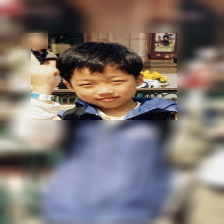

In [21]:
from google.colab.patches import cv2_imshow

width = 224
height = 224

image_0 = cv2.imread(source_path[30])
resized_image = cv2.resize(image_0, (width, height))

cv2_imshow(resized_image)

cv2.waitKey()
cv2.destroyAllWindows()

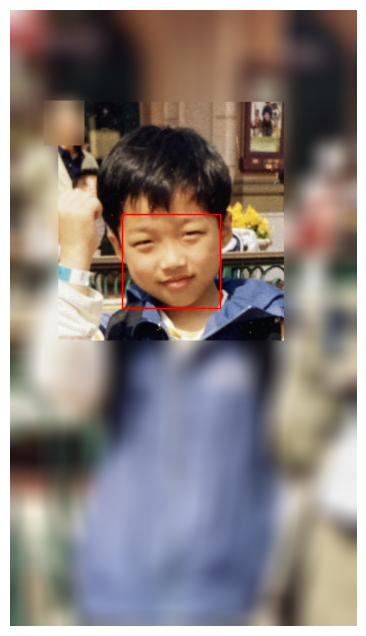

In [22]:
import matplotlib.patches as patches

def visualize_images_with_boxes(image, boxes):
    fig, axs = plt.subplots(1, 1, figsize=(8, 8))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs.imshow(image_rgb)

    rect = patches.Rectangle((boxes[0], boxes[1]), boxes[2], boxes[3], linewidth=1, edgecolor='r', facecolor='none')
    axs.add_patch(rect)

    axs.axis('off')
    plt.show()

box = label_0['annotation'][0]['box']
x, y, w, h = box['x'], box['y'], box['w'], box['h']
boxes = [x, y, w, h]

visualize_images_with_boxes(image_0, boxes)

In [ ]:
# # 이미지를 리사이즈 하면서 박스의 좌표를 조정하기 위한 함수
# def adjust_box_coordinates(box, original_size, new_size):
#     original_width, original_height = original_size
#     new_width, new_height = new_size

#     # 비율 계산
#     scale_width = new_width / original_width
#     scale_height = new_height / original_height

#     # 박스 좌표 조정
#     adjusted_box = torch.tensor([box['x'] * scale_width,
#                                  box['y'] * scale_height,
#                                  box['w'] * scale_width,
#                                  box['h'] * scale_height], dtype=torch.float32)

#     return adjusted_box

In [2]:
transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(5),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # ImageNet 평균
])

transform_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [3]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, data_root, label_root, transform=None):
        super().__init__()
        self.data_paths = []
        self.label_paths = []
        self.transform = transform

        for folder_name in os.listdir(data_root):
            data_folder_path = os.path.join(data_root, folder_name)
            label_folder_path = os.path.join(label_root, folder_name)

            if os.path.isdir(data_folder_path) and os.path.isdir(label_folder_path):
                for file_name in os.listdir(data_folder_path):
                    if file_name.endswith('.png'):
                        label_file_path = os.path.join(label_folder_path, file_name.replace('.png', '.json'))

                        if os.path.exists(label_file_path):
                            self.data_paths.append(os.path.join(data_folder_path, file_name))
                            self.label_paths.append(label_file_path)

    def __len__(self,):
        return len(self.data_paths)

    def __getitem__(self, idx):
        image_path = self.data_paths[idx]
        image = Image.open(image_path)
        original_image_size = image.size

        label_path = self.label_paths[idx]
        with open(label_path, 'r') as f:
            label_data = json.load(f)

        age_past = label_data['age_past']
        gender = label_data['gender']
        box = label_data['annotation'][0]['box']

        # box에 맞춰 이미지를 얼굴 부분만 crop
        image = image.crop((box['x'], box['y'], box['x'] + box['w'], box['y'] + box['h']))

        if self.transform:
            image = self.transform(image)

        # new_image_size = (224, 224)
        # box = adjust_box_coordinates(box, original_image_size, new_image_size)

        # 성별을 숫자로 변환
        gender_label = 0 if gender == 'male' else 1

        # 조정된 라벨 정보와 함께 이미지 반환
        label = {'age_past': age_past, 'gender': gender_label}

        return image, label

In [21]:
batch_size = 64
data_root = '/content/dataset/train/source/'
label_root = '/content/dataset/train/label/'

train_loader = torch.utils.data.DataLoader(
    Dataset(data_root, label_root, transform=transform_train),
    batch_size=batch_size,
    shuffle=True,
    num_workers=2,
    prefetch_factor=2
)

val_data = '/content/dataset/val/source/'
val_label = '/content/dataset/val/label/'

val_loader = torch.utils.data.DataLoader(
    Dataset(val_data, val_label, transform=transform_val),
    batch_size=batch_size,
    num_workers=2,
    prefetch_factor=2
)

In [22]:
x, y = next(iter(train_loader))
x.shape

torch.Size([64, 3, 224, 224])

In [23]:
y['age_past'].shape, y['gender'].shape

(torch.Size([64]), torch.Size([64]))

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
class Age_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 128, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.fc1 = nn.Linear(512 * 13 * 13, 512)
        self.dropout = nn.Dropout(0.25)
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x)))) # 224, 224
        x = self.pool(F.relu(self.bn2(self.conv2(x)))) # 112, 112
        x = self.pool(F.relu(self.bn3(self.conv3(x)))) # 56, 56
        x = self.pool(F.relu(self.bn4(self.conv4(x)))) # 28, 28
        x = x.view(-1, 512 * 13 * 13)
        x = F.relu(self.fc1(self.dropout(x)))
        x = self.fc2(x)
        x = x.squeeze()
        return x

In [7]:
class Gender_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 36, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(36)
        self.pool = nn.MaxPool2d(kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(36, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.conv5 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.fc1 = nn.Linear(512 * 6 * 6, 512)
        self.dropout = nn.Dropout(0.25)
        self.fc2 = nn.Linear(512, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x)))) # 224, 224
        x = self.pool(F.relu(self.bn2(self.conv2(x)))) # 112, 112
        x = self.pool(F.relu(self.bn3(self.conv3(x)))) # 56, 56
        x = self.pool(F.relu(self.bn4(self.conv4(x)))) # 28, 28
        x = self.pool(F.relu(self.bn5(self.conv5(x)))) # 14, 14
        x = x.view(-1, 512 * 6 * 6)
        x = F.relu(self.fc1(self.dropout(x)))
        x = self.fc2(x)
        x = x.squeeze()
        return x

In [25]:
age_model = Age_Net().to(device)
torchsummary.summary(age_model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [-1, 128, 224, 224]           3,584
       BatchNorm2d-2        [-1, 128, 224, 224]             256
         MaxPool2d-3        [-1, 128, 111, 111]               0
            Conv2d-4        [-1, 128, 111, 111]         147,584
       BatchNorm2d-5        [-1, 128, 111, 111]             256
         MaxPool2d-6          [-1, 128, 55, 55]               0
            Conv2d-7          [-1, 256, 55, 55]         295,168
       BatchNorm2d-8          [-1, 256, 55, 55]             512
         MaxPool2d-9          [-1, 256, 27, 27]               0
           Conv2d-10          [-1, 512, 27, 27]       1,180,160
      BatchNorm2d-11          [-1, 512, 27, 27]           1,024
        MaxPool2d-12          [-1, 512, 13, 13]               0
          Dropout-13                [-1, 86528]               0
           Linear-14                  [

In [26]:
gender_model = Gender_Net().to(device)
torchsummary.summary(gender_model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 36, 224, 224]           1,008
       BatchNorm2d-2         [-1, 36, 224, 224]              72
         MaxPool2d-3         [-1, 36, 111, 111]               0
            Conv2d-4         [-1, 64, 111, 111]          20,800
       BatchNorm2d-5         [-1, 64, 111, 111]             128
         MaxPool2d-6           [-1, 64, 55, 55]               0
            Conv2d-7          [-1, 128, 55, 55]          73,856
       BatchNorm2d-8          [-1, 128, 55, 55]             256
         MaxPool2d-9          [-1, 128, 27, 27]               0
           Conv2d-10          [-1, 256, 27, 27]         295,168
      BatchNorm2d-11          [-1, 256, 27, 27]             512
        MaxPool2d-12          [-1, 256, 13, 13]               0
           Conv2d-13          [-1, 512, 13, 13]       1,180,160
      BatchNorm2d-14          [-1, 512,

In [27]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.optim as optim

opt_age = optim.Adam(age_model.parameters(), lr=0.003)
age_lr_scheduler = ReduceLROnPlateau(opt_age, mode='min', verbose=True)

opt_gender = optim.Adam(gender_model.parameters(), lr=0.003)
gender_lr_scheduler = ReduceLROnPlateau(opt_gender, mode='min', verbose=True)

In [11]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.delta = delta
        self.best_loss = np.inf
        self.early_stop = False
        self.counter = 0

    def __call__(self, val_loss):
        if self.best_loss - val_loss > self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print("Early stopping")

In [28]:
early_stopping = EarlyStopping(patience=5, verbose=True)

In [29]:
def train_loop_age(dataloader, model, loss_fn, optimizer, epoch):
    model.train()
    size = len(dataloader.dataset)
    start_time = time.time()  # 에포크 시작 시간

    for batch, (x, y) in enumerate(dataloader):
        batch_start_time = time.time()  # 배치 처리 시작 시간
        x, y = x.to(device), y['age_past'].float().to(device)
        pred = model(x)
        loss = loss_fn(pred.squeeze(), y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_process_time = time.time() - batch_start_time

        if batch % 10 == 0:
            processed = (batch + 1) * len(x)
            print(f'Epoch {epoch+1} : [{processed} / {size}] loss : {loss.item()}, Batch time: {batch_process_time:.4f} sec')

    epoch_time = time.time() - start_time

    print(f"Epoch {epoch+1} finished, Total Epoch time: {epoch_time:.4f} sec")
    return loss.item()


In [30]:
def validation_loop_age(dataloader, model, loss_fn, device):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y['age_past'].float().to(device)
            pred = model(x)
            loss = loss_fn(pred, y)
            val_loss += loss.item()
    val_loss /= len(dataloader)
    return val_loss

In [31]:
def save_model(epoch, model, optimizer, path):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, path)

In [32]:
start = time.time()
for epoch in range(30):
    age_loss = train_loop_age(train_loader, age_model, nn.MSELoss(), opt_age, epoch)
    val_loss = validation_loop_age(val_loader, age_model, nn.MSELoss(), device)
    age_lr_scheduler.step(val_loss)

    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping triggered")
        save_model(epoch, age_model, opt_age, '/content/drive/age_model_checkpoint.pth')
        break

    save_model(epoch, age_model, opt_age, f'age_model_checkpoint_epoch_{epoch+1}.pth')
    print(f'Epoch : {epoch+1}, Loss : {age_loss}, Val_loss : {val_loss}')

total_time = time.time() - start
# 전체 학습 시간 출력
hours, rem = divmod(total_time, 3600)
minutes, seconds = divmod(rem, 60)
print("Total training time: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

Epoch 1 : [64 / 40050] loss : 521.220703125, Batch time: 0.1563 sec
Epoch 1 : [704 / 40050] loss : 494.103515625, Batch time: 0.0212 sec
Epoch 1 : [1344 / 40050] loss : 207.25733947753906, Batch time: 0.0199 sec
Epoch 1 : [1984 / 40050] loss : 300.2592468261719, Batch time: 0.0205 sec
Epoch 1 : [2624 / 40050] loss : 157.112548828125, Batch time: 0.0193 sec


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1 : [3264 / 40050] loss : 182.86172485351562, Batch time: 0.0195 sec
Epoch 1 : [3904 / 40050] loss : 202.17764282226562, Batch time: 0.0575 sec
Epoch 1 : [4544 / 40050] loss : 195.15919494628906, Batch time: 0.0380 sec
Epoch 1 : [5184 / 40050] loss : 195.86550903320312, Batch time: 0.0197 sec
Epoch 1 : [5824 / 40050] loss : 148.45176696777344, Batch time: 0.0407 sec
Epoch 1 : [6464 / 40050] loss : 195.8592071533203, Batch time: 0.0357 sec
Epoch 1 : [7104 / 40050] loss : 194.3556365966797, Batch time: 0.0596 sec
Epoch 1 : [7744 / 40050] loss : 158.91793823242188, Batch time: 0.0295 sec
Epoch 1 : [8384 / 40050] loss : 175.22579956054688, Batch time: 0.4736 sec
Epoch 1 : [9024 / 40050] loss : 130.74697875976562, Batch time: 0.5550 sec
Epoch 1 : [9664 / 40050] loss : 134.47023010253906, Batch time: 0.4981 sec
Epoch 1 : [10304 / 40050] loss : 238.23532104492188, Batch time: 0.4899 sec
Epoch 1 : [10944 / 40050] loss : 243.81932067871094, Batch time: 0.5315 sec
Epoch 1 : [11584 / 40050]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (133505320 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 1 : [12224 / 40050] loss : 177.19485473632812, Batch time: 0.5253 sec
Epoch 1 : [12864 / 40050] loss : 187.62857055664062, Batch time: 0.0196 sec
Epoch 1 : [13504 / 40050] loss : 166.68765258789062, Batch time: 0.5467 sec
Epoch 1 : [14144 / 40050] loss : 167.40359497070312, Batch time: 0.5294 sec
Epoch 1 : [14784 / 40050] loss : 171.57449340820312, Batch time: 0.5363 sec
Epoch 1 : [15424 / 40050] loss : 207.00076293945312, Batch time: 0.5115 sec
Epoch 1 : [16064 / 40050] loss : 173.0758819580078, Batch time: 0.5204 sec
Epoch 1 : [16704 / 40050] loss : 167.88951110839844, Batch time: 0.4972 sec
Epoch 1 : [17344 / 40050] loss : 150.0771942138672, Batch time: 0.4812 sec
Epoch 1 : [17984 / 40050] loss : 164.1639404296875, Batch time: 0.5042 sec
Epoch 1 : [18624 / 40050] loss : 184.18820190429688, Batch time: 0.5048 sec
Epoch 1 : [19264 / 40050] loss : 146.4065704345703, Batch time: 0.5160 sec
Epoch 1 : [19904 / 40050] loss : 147.67503356933594, Batch time: 0.5171 sec
Epoch 1 : [20544

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch : 1, Loss : 121.33084869384766, Val_loss : 272.64073791503904
Epoch 2 : [64 / 40050] loss : 160.74209594726562, Batch time: 0.0585 sec
Epoch 2 : [704 / 40050] loss : 123.2108154296875, Batch time: 0.0548 sec
Epoch 2 : [1344 / 40050] loss : 190.089111328125, Batch time: 0.0208 sec
Epoch 2 : [1984 / 40050] loss : 109.2822265625, Batch time: 0.4796 sec
Epoch 2 : [2624 / 40050] loss : 128.72119140625, Batch time: 0.4752 sec
Epoch 2 : [3264 / 40050] loss : 109.98146057128906, Batch time: 0.5244 sec
Epoch 2 : [3904 / 40050] loss : 150.82420349121094, Batch time: 0.5158 sec
Epoch 2 : [4544 / 40050] loss : 152.603271484375, Batch time: 0.5123 sec
Epoch 2 : [5184 / 40050] loss : 125.1286392211914, Batch time: 0.5214 sec
Epoch 2 : [5824 / 40050] loss : 96.3707504272461, Batch time: 0.4889 sec
Epoch 2 : [6464 / 40050] loss : 91.31106567382812, Batch time: 0.4727 sec
Epoch 2 : [7104 / 40050] loss : 153.82766723632812, Batch time: 0.5530 sec
Epoch 2 : [7744 / 40050] loss : 113.3150405883789, 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 2 : [14144 / 40050] loss : 110.27632141113281, Batch time: 0.5109 sec
Epoch 2 : [14784 / 40050] loss : 131.4429931640625, Batch time: 0.1080 sec
Epoch 2 : [15424 / 40050] loss : 103.85836791992188, Batch time: 0.0194 sec
Epoch 2 : [16064 / 40050] loss : 101.82997131347656, Batch time: 0.0369 sec
Epoch 2 : [16704 / 40050] loss : 101.32453918457031, Batch time: 0.0231 sec
Epoch 2 : [17344 / 40050] loss : 173.22262573242188, Batch time: 0.0202 sec
Epoch 2 : [17984 / 40050] loss : 131.53665161132812, Batch time: 0.0416 sec
Epoch 2 : [18624 / 40050] loss : 141.0672607421875, Batch time: 0.5009 sec
Epoch 2 : [19264 / 40050] loss : 144.1693878173828, Batch time: 0.0196 sec
Epoch 2 : [19904 / 40050] loss : 135.1893768310547, Batch time: 0.0402 sec
Epoch 2 : [20544 / 40050] loss : 154.48468017578125, Batch time: 0.0197 sec
Epoch 2 : [21184 / 40050] loss : 101.26730346679688, Batch time: 0.5382 sec
Epoch 2 : [21824 / 40050] loss : 126.42080688476562, Batch time: 0.5145 sec
Epoch 2 : [22464

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (133505320 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Epoch 2 : [31424 / 40050] loss : 80.5127182006836, Batch time: 0.5040 sec
Epoch 2 : [32064 / 40050] loss : 104.17078399658203, Batch time: 0.5253 sec
Epoch 2 : [32704 / 40050] loss : 115.95000457763672, Batch time: 0.4715 sec
Epoch 2 : [33344 / 40050] loss : 125.1985092163086, Batch time: 0.5403 sec
Epoch 2 : [33984 / 40050] loss : 96.83415222167969, Batch time: 0.5259 sec
Epoch 2 : [34624 / 40050] loss : 118.79695129394531, Batch time: 0.4995 sec
Epoch 2 : [35264 / 40050] loss : 78.76758575439453, Batch time: 0.5135 sec
Epoch 2 : [35904 / 40050] loss : 99.31211853027344, Batch time: 0.0206 sec
Epoch 2 : [36544 / 40050] loss : 105.06939697265625, Batch time: 0.0196 sec
Epoch 2 : [37184 / 40050] loss : 80.968017578125, Batch time: 0.5100 sec
Epoch 2 : [37824 / 40050] loss : 154.41168212890625, Batch time: 0.5181 sec
Epoch 2 : [38464 / 40050] loss : 100.4800796508789, Batch time: 0.5085 sec
Epoch 2 : [39104 / 40050] loss : 139.3477783203125, Batch time: 0.5087 sec
Epoch 2 : [39744 / 4005

KeyboardInterrupt: 

In [ ]:
batch_size = 64
data_root = '/content/dataset/train/source/'
label_root = '/content/dataset/train/label/'

train_loader = torch.utils.data.DataLoader(
    Dataset(data_root, label_root, transform=transform_train),
    batch_size=batch_size,
    shuffle=True,
    num_workers=4,
    prefetch_factor=4
)

val_data = '/content/dataset/val/source/'
val_label = '/content/dataset/val/label/'

val_loader = torch.utils.data.DataLoader(
    Dataset(val_data, val_label, transform=transform_val),
    batch_size=batch_size,
    num_workers=4,
    prefetch_factor=4
)

In [ ]:
def train_loop_gender(dataloader, model, loss_fn, optimizer, epoch):
    model.train()
    size = len(dataloader.dataset)
    start_time = time.time()  # 에포크 시작 시간

    for batch, (x, y) in enumerate(dataloader):
        batch_start_time = time.time()  # 배치 처리 시작 시간
        x, y = x.to(device), y['gender'].float().to(device)
        pred = model(x)
        loss = loss_fn(pred.squeeze(), y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batch_process_time = time.time() - batch_start_time

        if batch % 10 == 0:
            processed = (batch + 1) * len(x)
            print(f'Epoch {epoch+1} : [{processed} / {size}] loss : {loss.item()}, Batch time: {batch_process_time:.4f} sec')

    epoch_time = time.time() - start_time
    print(f"Epoch {epoch+1} finished, Total Epoch time: {epoch_time:.4f} sec")
    return loss.item()


In [ ]:
def validation_loop_gender(dataloader, model, loss_fn, device):
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y['gender'].float().to(device)
            pred = model(x)
            loss = loss_fn(pred, y)
            val_loss += loss.item()
    val_loss /= len(dataloader)
    return val_loss

In [ ]:
start = time.time()
for epoch in range(30):
    gender_loss = train_loop_gender(train_loader, gender_model, nn.BCEWithLogitsLoss(), opt_gender, epoch)
    val_loss = validation_loop_gender(val_loader, gender_model, nn.BCEWithLogitsLoss(), device)
    gender_lr_scheduler.step(val_loss)
    early_stopping(val_loss)

    if early_stopping.early_stop:
        print("Early stopping triggered")
        save_model(epoch, gender_model, opt_gender, '/content/drive/MyDrive/gender_model_checkpoint.pth')
        break

    save_model(epoch, gender_model, opt_gender, f'gender_model_checkpoint_epoch_{epoch+1}.pth')
    print(f'Epoch : {epoch+1}, Loss : {gender_loss}, Val_loss : {val_loss}')

total_time = time.time() - start
hours, rem = divmod(total_time, 3600)
minutes, seconds = divmod(rem, 60)
print("Total training time: {:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))